<a href="https://colab.research.google.com/github/dheeraj0000/2216177_AIML_Bootcamp_2023/blob/main/Salary_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Step-1:  Reading the dataset**

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Boot Camp/Salary Predict Project/Salary_Dataset.csv")
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
df.shape  #Gives the no. of rows and columns in data set 

(35, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  32 non-null     float64
 1   Salary           32 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


### **Step-2: Visualisation**

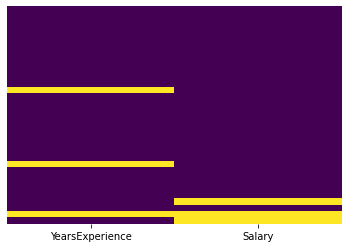

In [ ]:
#To see whether our dataset is having missing_values or Null Values
import seaborn as sns
import matplotlib.pyplot as plt

def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
  return plt.show()

get_heatmap(df)


In [ ]:
'''
# Another visualization techiniques for detecting null values
import missingno as msno

msno.matrix(df)   # Visualize missing values as a matrix
msno.bar(df)      # Visualize missing values as a bar graphs
'''

'\n# Another visualization techiniques for detecting null values\nimport missingno as msno\n\nmsno.matrix(df)   # Visualize missing values as a matrix\nmsno.bar(df)      # Visualize missing values as a bar graphs\n'

## **Step-3: Pre-Processing**

In [ ]:
#Deleting the records having Nall values we use below method as data set is smaller, we add values to it
'''
df = df.dropna()'''

#Calculating the average values as to replace null values

import math as m
median_years = m.floor(df['YearsExperience'].median())
print(median_years)

mean_sal=m.floor(df['Salary'].mean())
print(mean_sal)

4
76336


In [ ]:
#Replacing Nan Values in data set
df['YearsExperience']=df['YearsExperience'].fillna(median_years)

df['Salary']=df['Salary'].fillna(mean_sal)

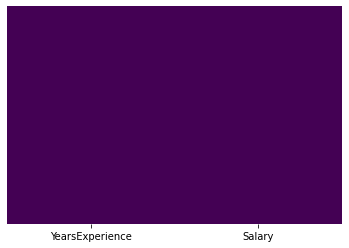

In [ ]:
#To see whether our dataset is having missing_values
'''
import seaborn as sns
import matplotlib.pyplot as plt

def get_heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
  return plt.show()
'''

get_heatmap(df)

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


###  **Step-4: Prepare Data**

In [ ]:
#Method1 - Loading the data into X and Y
#X - Independent - YearsExperience
#Y - Dependent - Salary
'''
X = df['YearsExperience']
Y = df['Salary']'''

#2D - Dataframe - for feeding a ML Model, as we need to feed 2D Data only
X = df.iloc[:,:-1].values
Y = df.iloc[:,1:].values


In [ ]:
#Method2 - Loading the data into X and Y
import numpy as np
train_x=df[['YearsExperience']]

In [ ]:
train_x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [ ]:
Y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.],
       [105582.],
       [ 76336.],
       [ 57081.],
       [ 76336.],
       [ 76336.]])

### **Step-5: Splitting the dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [ ]:
X_train

array([[9.5],
       [4.1],
       [9.5],
       [9. ],
       [3.2],
       [4. ],
       [2.9],
       [5.3],
       [4.5],
       [4. ],
       [8.7],
       [1.3],
       [4. ],
       [3. ],
       [8.2],
       [2.2],
       [5.9],
       [7.1],
       [6. ],
       [3.7],
       [3.2],
       [4. ],
       [2. ],
       [1.1]])

In [ ]:
X_test

array([[10.5],
       [ 6.8],
       [ 5.1],
       [10.3],
       [ 7.9],
       [ 4.9],
       [ 3.9],
       [ 1.5],
       [ 4. ],
       [ 9.6],
       [ 4. ]])

**Step-6: (Training) Fitting the algorithm / Feeding the Model**

#Linear regression 

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

## Fitting the algorithm

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

**Step-7: Testing the model**

In [ ]:
Y_pred=model.predict(X_test)

**Step-8: Model Evaluation**

Text(0.5, 1.0, 'ML Model Evaluation')

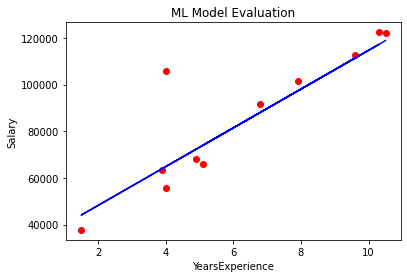

In [ ]:
import matplotlib.pyplot as plt
#Visualising the test results
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,model.predict(X_test),color='blue')   # plt.plot(X_test,Y_pred,color='blue') 
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('ML Model Evaluation')

**Step-9: Analysing**

In [ ]:
#For Testing Dataset the calculated score is 
print("The testing data accurate =",model.score(X_test,y_test))

The testing data accurate = 0.7714363598023589


In [ ]:
#For Overall Dataset the calculated score is 
print("The Total dataset accurate =",model.score(X,Y)*100)

The Total dataset accurate = 80.89407543956742


In [ ]:
#For Traning Dataset the calculated score is 
print("The Training dataset accurate =",model.score(X_train,y_train))

The Training dataset accurate = 0.8112154371973727


# **Last Step: Deployment** 

In [ ]:
y=float(input("Enter Experience"))

y_res=model.predict([[y]])
print("Salary =",m.floor(y_res))

Enter Experience6
Salary = 81449
